In [2]:
from  sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, RobustScaler

In [3]:
df = pd.read_csv("cal_housing.csv")
X = df.drop("medianHouseValue", axis=1)
y = df["medianHouseValue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)
X_test
y_test

14740    136900.0
10101    241300.0
20566    200700.0
2670      72500.0
15709    460000.0
           ...   
6655     169500.0
3505     204600.0
1919     128600.0
1450     259500.0
4148     167600.0
Name: medianHouseValue, Length: 4128, dtype: float64

In [4]:
def fit_model(model, X, y, name="Modelo"):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f"{name} -> Coef: {model.coef_}, Intercept: {model.intercept_}, MSE: {mse}")
    
    return y_pred

In [5]:
def evaluar(X, y, modelo):
    predicciones = modelo.predict(X)
    mse = mean_squared_error(y, predicciones)
    r2 = r2_score(y, predicciones)
    
    return (predicciones, mse, r2)

## Escalamiento

Es transformar los datos para que estén en una escala adecuada y consistente.

Es el proceso de transformar los datos en una escala común para que todas las features tengan la misma "importancia" en modelos sensibles a la escala (como regresión lineal, modelos basados en gradiente), ya que si no la convergencia puede ser lenta o inestable.

Se aplica siempre que las features tengan magnitudes diferentes y con modelos sensibles a la escala.

- Estandarizado: Centra los datos en media 0 y los deja con desviación estándar 1. Conviene usarlo cuando no hay outliers extremos o son aproximadamente gaussianos.

- Robusto: Usa mediana y percentiles, menos sensible a outliers. Conviene usarlo cuando los datos tienen outliers importantes y para evitar que valores extremos distorsionen la escala de los demás datos.

OLS Lineal -> Coef: [-4.27939351e+04 -4.24672808e+04  1.16271465e+03 -7.65158962e+00
  1.06463335e+02 -3.79979950e+01  5.14142110e+01  4.02307900e+04], Intercept: -3594230.649380597, MSE: 4827402539.920021


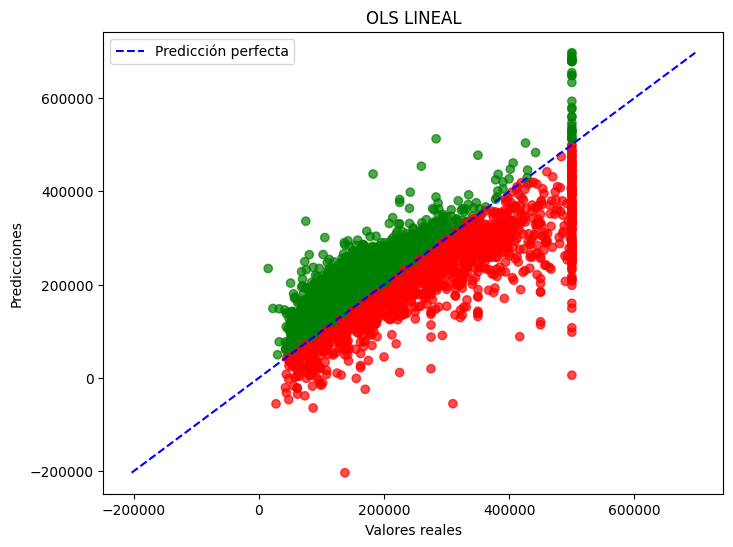

MSE: 4853781771.94794 --- R2: 0.6277645980446471


In [6]:
# OLS LINEAL
ols = LinearRegression()
fit_model(ols, X_train, y_train, "OLS Lineal")
predicciones, ols_lineal_mse, ols_lineal_r2 = evaluar(X_test, y_test, ols)

# Crear colores según si la predicción sobreestima o subestima
colores = ['green' if p >= y else 'red' for p, y in zip(predicciones, y_test)]

plt.figure(figsize=(8,6))
plt.scatter(y_test, predicciones, color=colores, alpha=0.7)

# Línea de referencia: predicción perfecta (y = y_pred)
max_val = max(max(y_test), max(predicciones))
min_val = min(min(y_test), min(predicciones))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='Predicción perfecta')

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("OLS LINEAL")
plt.legend()
plt.show()

print(f'MSE: {ols_lineal_mse} --- R2: {ols_lineal_r2}')

OLS Polinomio 2 -> Coef: [ 7.07547970e+05  9.81182187e+05 -7.66306689e+04  9.35781772e+02
 -4.12644047e+03  5.62058308e+02 -2.45498200e+03 -9.28602735e+05
  4.70843800e+03  1.22010110e+04 -9.30846497e+02  1.21400075e+01
 -5.84090744e+01  7.98417261e+00 -2.81298627e+01 -1.19806964e+04
  6.97021130e+03 -1.00626626e+03  1.29103963e+01 -7.12422509e+01
  1.13656031e+01 -2.89566003e+01 -1.25102729e+04  2.28263892e+01
 -1.72242354e-01  3.28936309e+00 -1.39955463e+00  2.45920404e+00
  1.02582682e+02 -1.78230084e-03  3.05601241e-02 -4.97788373e-03
  7.50115147e-03  9.49462870e+00 -1.52549007e-01  3.76019620e-02
  9.51386591e-03 -4.20600329e+01  2.70916917e-03 -2.99910351e-02
 -7.00942009e+00  2.65927325e-02  1.91979776e+01 -2.48476842e+03], Intercept: 25465997.303503945, MSE: 3991962437.5335345


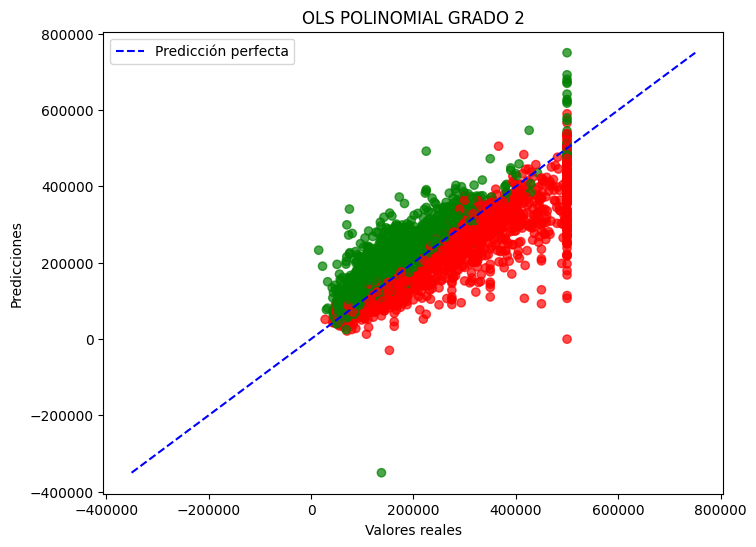

MSE: 4076152873.5502996 --- R2: 0.687400778484415


In [19]:
# OLS POLINOMIAL GRADO 2

poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)
ols2 = LinearRegression()
fit_model(ols2, X_train_poly2, y_train, "OLS Polinomio 2")

predicciones, ols_poly2_mse, ols_poly2_r2 = evaluar(X_test_poly2, y_test, ols2)

plt.figure(figsize=(8,6))
plt.scatter(y_test, predicciones, color=colores, alpha=0.7)

# Línea de referencia: predicción perfecta (y = y_pred)
max_val = max(max(y_test), max(predicciones))
min_val = min(min(y_test), min(predicciones))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='Predicción perfecta')

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("OLS POLINOMIAL GRADO 2")
plt.legend()
plt.show()


print(f'MSE: {ols_poly2_mse} --- R2: {ols_poly2_r2}')

## Explicaciones del código

`fit_transform`: ajusta el escalador con los datos de entrenamiento y transforma esos datos.

`transform`: Transforma nuevos datos usando los parámetros del escalador ya ajustado.

Nunca se usa `fit_transform` en test porque eso filtraría información del test y causaría data leakage.

`y_train.values.reshape(-1,1)`: el objetivo es escalar a y_train, pero StandardScaler espera una matriz 2D con forma (n_samples, n_features). `y_train.values` convierte a y en un array de Numpy y `.reshape(-1,1)` convierte el array en un array 2D; el -1 le dice a numpy que calcule automáticamente cuántas filas necesito y el 1 dice que necesito una columna.

In [ ]:
# Escalamiento esándar

# Crear escaladores
scaler_X = StandardScaler()

# Ajustar y transformar X_train
X_train_scaled = scaler_X.fit_transform(X_train_poly2)
X_test_scaled = scaler_X.transform(X_test_poly2)

OLS Polinomio 2 Estandarizado -> Coef: [ 1418768.48025381  2096283.18468011  -965593.66830284  2046393.36044776
 -1742481.18376667   642448.26962817  -938959.78151408 -1770590.76050597
  2263448.69667522  3953675.62016885 -1411916.28929946  3160102.18350423
 -2934722.1177808   1085957.75691573 -1282197.06621104 -2735178.10318555
  1076481.27746332  -459789.77664859   996570.50507531 -1059182.80696685
   455923.17819964  -391033.81551697  -844817.78317637    17143.22852221
    -7287.76349068    30651.93490331   -35316.39792344    21338.3838831
     7696.95866754   -62967.40687789   191511.35794725   -91499.92489389
    42346.07488605   121779.96529206  -184224.22333521   128809.57639364
    10321.34842358   -86146.33449083    38315.75163227   -96380.22159112
   -39101.84007005    26633.64527636    36418.5577325    -54754.42693666], Intercept: 207249.89589317216, MSE: 3991962437.5334907
[204089.93251292 267802.08318081 160926.60675785 ... 123300.4087832
 268496.46443938 209390.80058916]


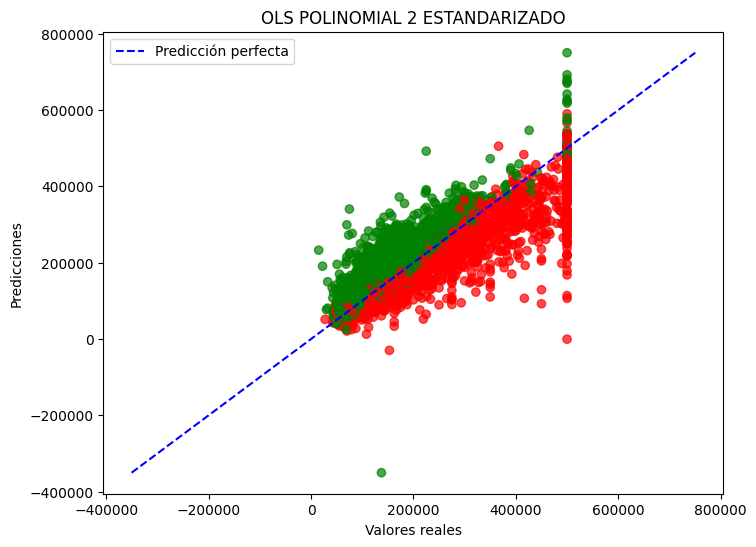

MSE: 4076152877.9206915 --- R2: 0.6874007781492507


In [ ]:
# OLS POLINOMIAL 2 ESTANDARIZADO

ols2_estandar = LinearRegression()
fit_model(ols2_estandar, X_train_scaled, y_train, "OLS Polinomio 2 Estandarizado")

predicciones, olsest_poly2_mse, olsest_poly2_r2 = evaluar(X_test_scaled, y_test, ols2_estandar)

plt.figure(figsize=(8,6))
plt.scatter(y_test, predicciones, color=colores, alpha=0.7)

# Línea de referencia: predicción perfecta (y = y_pred)
print(predicciones)
max_val = max(max(y_test), max(predicciones))
min_val = min(min(y_test), min(predicciones))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='Predicción perfecta')

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("OLS POLINOMIAL 2 ESTANDARIZADO")
plt.legend()
plt.show()


print(f'MSE: {olsest_poly2_mse} --- R2: {olsest_poly2_r2}')

In [10]:
# Escalamiento robusto

scaler_X = RobustScaler()

X_train_scaled = scaler_X.fit_transform(X_train_poly2)
X_test_scaled = scaler_X.transform(X_test_poly2)

OLS Polinomio 2 Robusto -> Coef: [ 2.68868220e+06  3.70886864e+06 -1.45598263e+06  1.59176496e+06
 -1.45663368e+06  5.27772592e+05 -8.00323923e+05 -2.02523623e+06
  4.29051695e+06  7.27845274e+06 -2.07036074e+06  2.46624692e+06
 -2.45888607e+06  8.93393204e+05 -1.09215376e+06 -3.13635302e+06
  1.88752769e+06 -6.76281340e+05  7.87239581e+05 -8.92874232e+05
  3.78719132e+05 -3.33396852e+05 -9.72094090e+05  2.38535832e+04
 -8.44245841e+03  3.41082289e+04 -3.99369924e+04  2.42452955e+04
  8.42004986e+03 -1.39366965e+04  4.74124204e+04 -2.01015047e+04
  1.08461216e+04  8.64790237e+04 -5.06726614e+04  3.18842453e+04
  2.93258492e+03 -6.75196522e+04  6.38266980e+03 -2.37561465e+04
 -2.97891955e+04  7.66360003e+03  2.93181378e+04 -3.96367886e+04], Intercept: 132453.12678054534, MSE: 3991962437.5334926


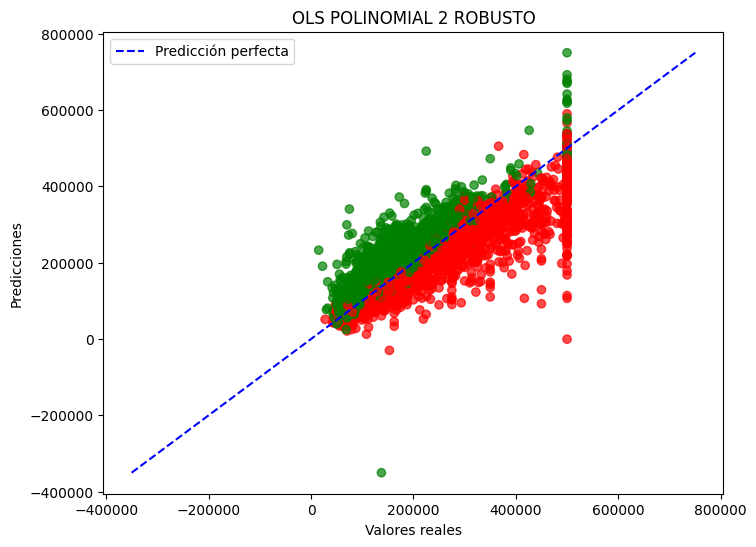

MSE: 4076152877.9206486 --- R2: 0.6874007781492539


In [ ]:
# OLS POLINOMIAL 2 ROBUSTO

ols2_robusto = LinearRegression()
fit_model(ols2_robusto, X_train_scaled, y_train, "OLS Polinomio 2 Robusto")

predicciones, olsrob_poly2_mse, olsrob_poly2_r2 = evaluar(X_test_scaled, y_test, ols2_robusto)

plt.figure(figsize=(8,6))
plt.scatter(y_test, predicciones, color=colores, alpha=0.7)

# Línea de referencia: predicción perfecta (y = y_pred)
max_val = max(max(y_test), max(predicciones))
min_val = min(min(y_test), min(predicciones))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='Predicción perfecta')

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("OLS POLINOMIAL 2 ROBUSTO")
plt.legend()
plt.show()


print(f'MSE: {olsrob_poly2_mse} --- R2: {olsrob_poly2_r2}')

OLS Polinomio 3 -> Coef: [ 2.26385131e-01 -1.39068807e-01 -3.99633071e+00 -3.11042121e-01
  1.04977770e-01  2.29195348e+00 -4.93523092e-01  1.31813400e-02
 -2.68149873e+01  1.21005292e+01  2.43466229e+02  2.45151342e+01
  5.12634850e+00 -2.89286992e+01  4.45156459e+01 -6.69032149e-01
 -3.98278311e+00 -7.45319307e+01  1.19629144e+02  1.64609115e+01
 -4.28301374e+01 -4.05237437e+00  1.27126508e-01 -1.27399617e+02
  1.51652615e+01 -6.11794999e+01 -1.56528326e+00 -3.35280293e+01
 -3.57844012e+00  1.46369619e-01 -1.27035369e+00  2.51102916e-01
  2.72509835e-02 -2.45218695e+02  2.21414311e-01 -1.04007305e+01
  3.22503972e+01 -4.79965329e+01 -2.06847111e-01  1.05671476e+01
 -1.86431364e+02 -3.22901145e+01 -4.54389749e+01  5.31803888e+00
 -4.62062530e+00 -2.31815111e+01 -3.24260635e+00  3.79118299e-01
  6.49225810e-01 -2.12793364e-01 -1.51433345e+00 -6.70134437e+00
 -3.42003765e+01 -3.67014759e+01  2.30450325e+00  3.65709853e+00
 -2.01851846e-01 -1.18006025e+01 -3.90822521e+00 -6.79357173e-01


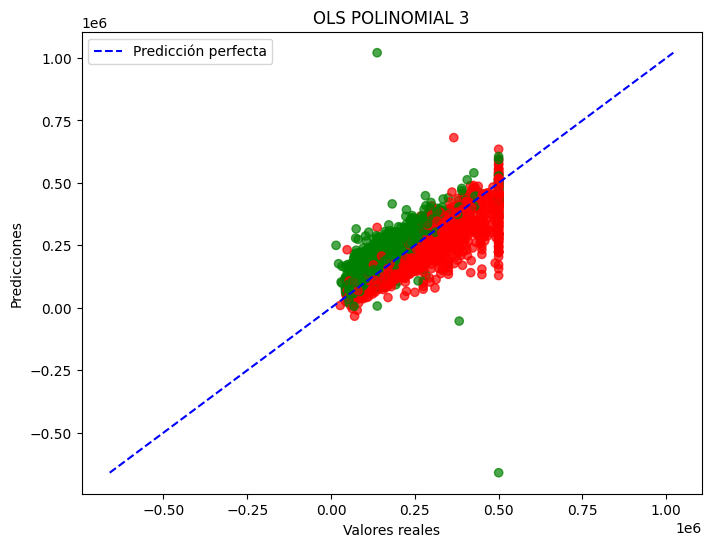

MSE: 4136311077.28595 --- R2: 0.6827872597477733


In [12]:
# OLS POLINOMIAL 3

poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)
ols3 = LinearRegression()
fit_model(ols3, X_train_poly3, y_train, "OLS Polinomio 3")

predicciones, ols_poly3_mse, ols_poly3_r2 = evaluar(X_test_poly3, y_test, ols3)

plt.figure(figsize=(8,6))
plt.scatter(y_test, predicciones, color=colores, alpha=0.7)

# Línea de referencia: predicción perfecta (y = y_pred)
max_val = max(max(y_test), max(predicciones))
min_val = min(min(y_test), min(predicciones))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='Predicción perfecta')

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("OLS POLINOMIAL 3")
plt.legend()
plt.show()

print(f'MSE: {ols_poly3_mse} --- R2: {ols_poly3_r2}')

In [ ]:
# Escalamiento esándar

# Crear escaladores
scaler_X = StandardScaler()

# Ajustar y transformar X_train 
X_train_scaled = scaler_X.fit_transform(X_train_poly3)
X_test_scaled = scaler_X.transform(X_test_poly3)

OLS Polinomio 3 Estandarizado -> Coef: [-1.81206263e+06  3.91157282e+07  1.87131560e+07  6.82080306e+07
 -6.43129362e+07  4.78248377e+07 -6.01355878e+07 -1.02273849e+07
  3.04923860e+07  1.52627354e+08  5.04717124e+07  1.63933208e+08
 -1.44518232e+08  8.32986734e+07 -1.39505104e+08 -2.16921686e+07
  4.28030603e+07  1.36336024e+07  2.95444063e+07 -2.00741324e+07
 -1.24489329e+07 -1.47106369e+07 -2.55086358e+06 -7.70181702e+05
  1.60234970e+06  6.77219075e+05  3.89952980e+05 -2.98511363e+06
 -1.20739451e+06 -4.51796441e+06  9.61421504e+05 -1.80661646e+05
  9.03613401e+06  5.87557904e+05  3.74988843e+06 -2.29155605e+07
  1.84156615e+07 -1.63829248e+06 -3.67520231e+06  2.66063578e+07
  2.91466307e+06 -2.84488263e+07 -4.09361994e+06  1.22476329e+06
  4.13876178e+07  1.43123885e+08  3.28538176e+07  1.05445264e+08
 -8.31013056e+07  3.16807546e+07 -8.79089920e+07 -1.17408577e+07
  7.55580395e+07  1.62354407e+07  4.94741855e+07 -2.78731990e+07
 -2.08724964e+07 -2.80450873e+07 -3.10104299e+06 -1

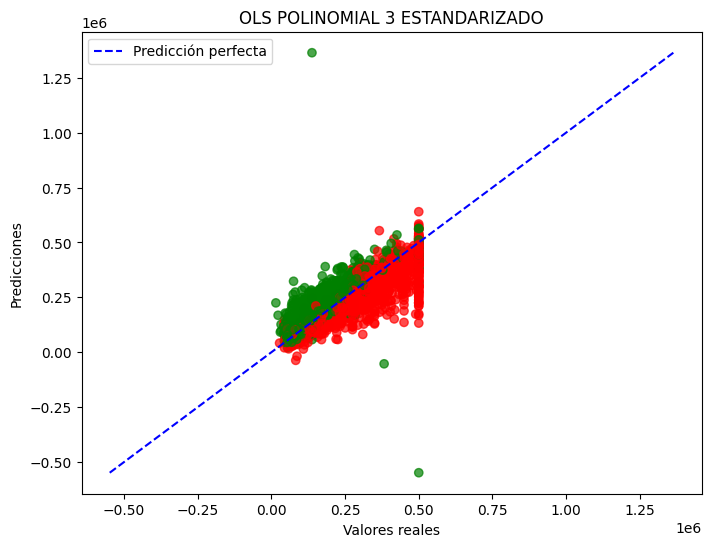

MSE: 4103523449.508838 --- R2: 0.6853017353418991


In [14]:
# OLS POLINOMIAL 3 ESTANDARIZADO

ols3_estandar = LinearRegression()
fit_model(ols3_estandar, X_train_scaled, y_train, "OLS Polinomio 3 Estandarizado")

predicciones, olsest_poly3_mse, olsest_poly3_r2 = evaluar(X_test_scaled, y_test, ols3_estandar)

plt.figure(figsize=(8,6))
plt.scatter(y_test, predicciones, color=colores, alpha=0.7)

# Línea de referencia: predicción perfecta (y = y_pred)
print(predicciones)
max_val = max(max(y_test), max(predicciones))
min_val = min(min(y_test), min(predicciones))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='Predicción perfecta')

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("OLS POLINOMIAL 3 ESTANDARIZADO")
plt.legend()
plt.show()


print(f'MSE: {olsest_poly3_mse} --- R2: {olsest_poly3_r2}')

In [15]:
# Escalamiento robusto

scaler_X = RobustScaler()

X_train_scaled = scaler_X.fit_transform(X_train_poly3)
X_test_scaled = scaler_X.transform(X_test_poly3)

OLS Polinomio 3 Robusto -> Coef: [-3.43400674e+06  6.92058682e+07  2.82168690e+07  5.30548794e+07
 -5.37626400e+07  3.92882038e+07 -5.12566677e+07 -1.16982822e+07
  5.78003378e+07  2.80976765e+08  7.40090987e+07  1.27938828e+08
 -1.21086036e+08  6.85279591e+07 -1.18828087e+08 -2.48738093e+07
  7.50518964e+07  2.00529707e+07  2.33385655e+07 -1.69221738e+07
 -1.03408848e+07 -1.25423425e+07 -2.93516479e+06 -1.07165306e+06
  1.85623076e+06  7.53581895e+05  4.40972186e+05 -3.39177336e+06
 -1.32082325e+06 -9.99969697e+05  2.38018889e+05 -3.96893323e+04
  2.31442957e+06  4.17239681e+05  1.03144322e+06 -5.67229062e+06
  5.23240656e+06 -1.28405856e+06 -6.12218260e+05  6.55803155e+06
  2.22049570e+06 -8.18590259e+06 -3.29549880e+06  8.86607462e+05
  7.84646702e+07  2.66402284e+08  4.85641671e+07  8.30491273e+07
 -6.99586795e+07  2.62820748e+07 -7.50029458e+07 -1.34598379e+07
  1.35465784e+08  2.37888746e+07  3.94502981e+07 -2.36578684e+07
 -1.73746654e+07 -2.38155581e+07 -3.55813643e+06 -1.42326

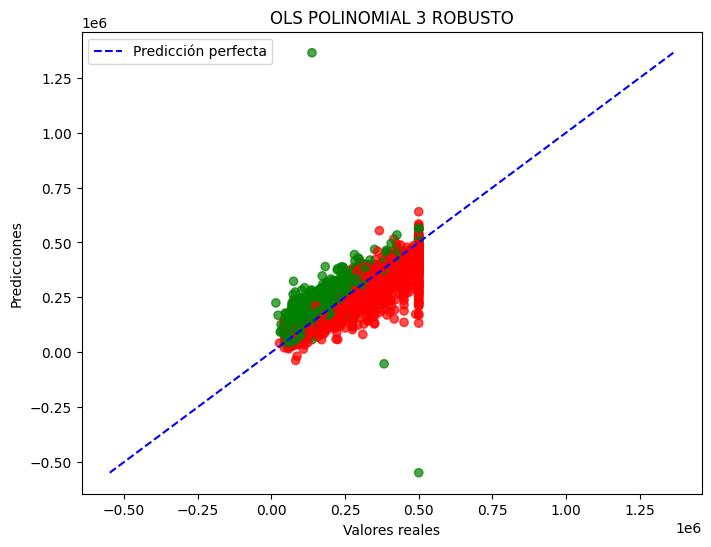

MSE: 4103523449.609568 --- R2: 0.6853017353341742


In [16]:
# OLS POLINOMIAL 3 ROBUSTO

ols3_robusto = LinearRegression()
fit_model(ols3_robusto, X_train_scaled, y_train, "OLS Polinomio 3 Robusto")

predicciones, olsrob_poly3_mse, olsrob_poly3_r2 = evaluar(X_test_scaled, y_test, ols3_robusto)

plt.figure(figsize=(8,6))
plt.scatter(y_test, predicciones, color=colores, alpha=0.7)

# Línea de referencia: predicción perfecta (y = y_pred)
max_val = max(max(y_test), max(predicciones))
min_val = min(min(y_test), min(predicciones))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='Predicción perfecta')

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("OLS POLINOMIAL 3 ROBUSTO")
plt.legend()
plt.show()


print(f'MSE: {olsrob_poly3_mse} --- R2: {olsrob_poly3_r2}')

In [17]:
# Resumen de resultados

print("                                                       \tMSE\t\t\tR2")
print(f"Regresión lineal con OLS                              \t{ols_lineal_mse}\t{ols_lineal_r2}")
print(f"Regresión polinomial grado 2                          \t{ols_poly2_mse}\t{ols_poly2_r2}")
print(f"Regresión polinomial grado 2 con escalamiento estándar\t{olsest_poly2_mse}\t{olsest_poly2_r2}")
print(f"Regresión polinomial grado 2 con escalamiento robusto \t{olsrob_poly2_mse}\t{olsrob_poly2_r2}")
print(f"Regresión polinomial grado 3                          \t{ols_poly3_mse}\t{ols_poly3_r2}")
print(f"Regresión polinomial grado 3 con escalamiento estándar\t{olsest_poly3_mse}\t{olsest_poly3_r2}")
print(f"Regresión polinomial grado 3 con escalamiento robusto \t{olsrob_poly3_mse}\t{olsrob_poly3_r2}")

                                                       	MSE			R2
Regresión lineal con OLS                              	4853781771.94794	0.6277645980446471
Regresión polinomial grado 2                          	4076152873.5502996	0.687400778484415
Regresión polinomial grado 2 con escalamiento estándar	4076152877.9206915	0.6874007781492507
Regresión polinomial grado 2 con escalamiento robusto 	4076152877.9206486	0.6874007781492539
Regresión polinomial grado 3                          	4136311077.28595	0.6827872597477733
Regresión polinomial grado 3 con escalamiento estándar	4103523449.508838	0.6853017353418991
Regresión polinomial grado 3 con escalamiento robusto 	4103523449.609568	0.6853017353341742
